In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import plotly.graph_objects as go

In [32]:
from datetime import datetime

In [115]:
df1 = pd.read_csv("/content/labour-market-report-chart-1-Emplyment in Ontario june 23.csv")
df2 = pd.read_csv("/content/labour-market-report-chart-2-Industries with highest and lowest emp change jun 23.csv")
df3 = pd.read_csv("/content/labour-market-report-chart-3-employment change in ontario june 23.csv")
df5 = pd.read_csv("/content/labour-market-report-chart-5-unemployment rates.csv")
df8 = pd.read_csv("/content/labour-market-report-chart-8- change in wage rate and CPI june 23.csv")


In [36]:
df1.info()
df1.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 2 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Date                                               222 non-null    object 
 1   Ontario employment (x 1,000), seasonally adjusted  222 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.6+ KB


,Date,"Ontario employment (x 1,000), seasonally adjusted"
0,01-01-2005,6330.9
1,02-01-2005,6348.8
2,03-01-2005,6348.4
3,04-01-2005,6364.2
4,05-01-2005,6387.2


In [38]:
# Create a DataFrame
df = pd.DataFrame(df1)

# Convert 'Date' column to datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Create an interactive line plot using Plotly
fig = go.Figure()

fig.add_trace(go.Scatter(x=df['Date'], y=df['Ontario employment (x 1,000), seasonally adjusted'],
                         mode='lines+markers', name='Ontario Employment (x 1,000)'))

fig.update_layout(title='Ontario Employment Trend',
                  xaxis_title='Date',
                  yaxis_title='Ontario employment (x 1,000)',
                  xaxis=dict(type='category'),
                  yaxis=dict(title=dict(text='Ontario employment (x 1,000)')),
                  hovermode='x',
                  template='plotly_white')

# Show the interactive graph
fig.show()

In [113]:
!pip install pystan==2.19.1.1
!pip install fbprophet


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.2/16.2 MB 46.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for pystan
  Running setup.py clean for pystan
Failed to build pystan
ERROR: Could not build wheels for pystan, which is required to install pyproject.toml-based projects
  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Preparing metadata (setup.py) ... done
  Using cached cmdstanpy-0.9.5-py3-none-any.whl (37 kB)
  Using cached pystan-3.7.0-py3-none-any.whl (13 kB)
  Using cached setuptools_git-1.2-py2.py3-none-any.whl (10 kB)
  Using cached clikit-0.6.2-py2.py3-none-any.whl (91 kB)
  Using cached httpstan-4.10.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (44.4 MB)
  Using cached pysimdjson-

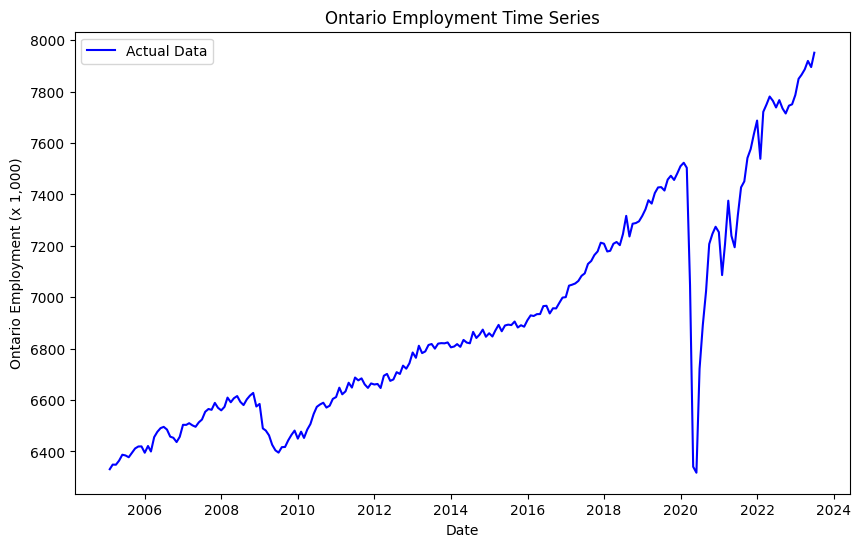

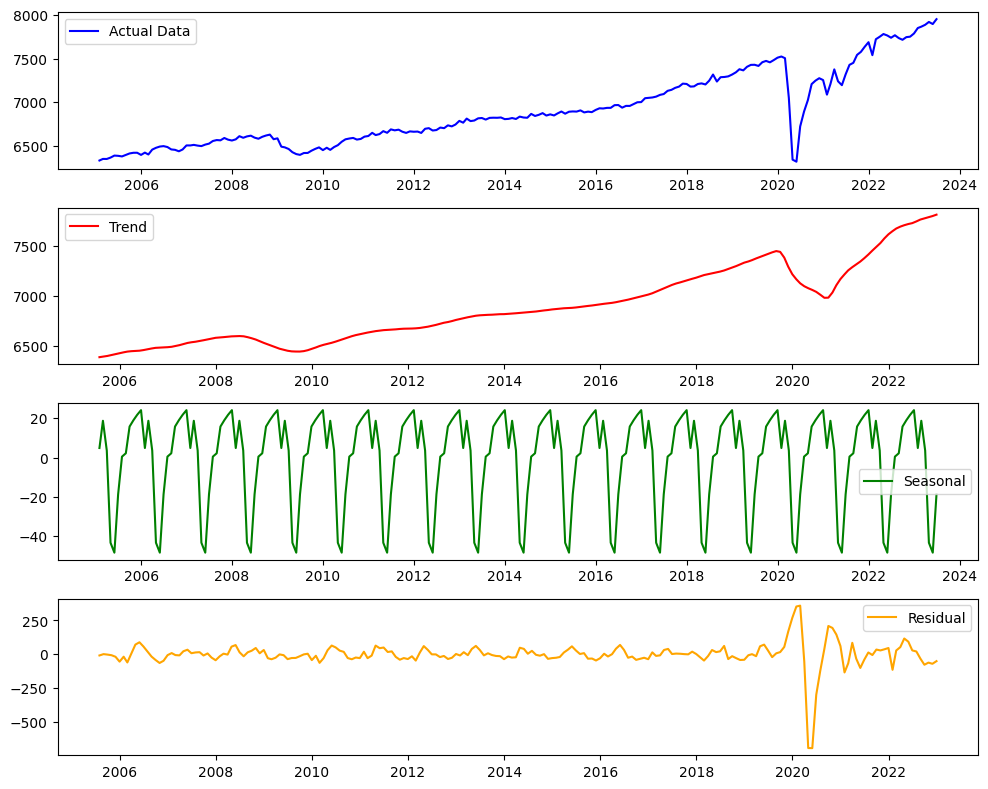

In [120]:
import statsmodels.api as sm
df = pd.DataFrame(df1)
# Convert 'Date' column to datetime type
# Convert 'Date' column to datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' column as the index
df.set_index('Date', inplace=True)

# Manually set the frequency to monthly (M)
df.index = pd.date_range(start=df.index[0], periods=len(df), freq='M')

# Plot the original data
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Ontario employment (x 1,000), seasonally adjusted'], label='Actual Data', color='blue')
plt.xlabel('Date')
plt.ylabel('Ontario Employment (x 1,000)')
plt.title('Ontario Employment Time Series')
plt.legend()
plt.show()

# Seasonal Decomposition
decomposition = sm.tsa.seasonal_decompose(df['Ontario employment (x 1,000), seasonally adjusted'], model='additive')

# Trend, Seasonal, and Residual components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot components
plt.figure(figsize=(10, 8))
plt.subplot(411)
plt.plot(df.index, df['Ontario employment (x 1,000), seasonally adjusted'], label='Actual Data', color='blue')
plt.legend()
plt.subplot(412)
plt.plot(df.index, trend, label='Trend', color='red')
plt.legend()
plt.subplot(413)
plt.plot(df.index, seasonal, label='Seasonal', color='green')
plt.legend()
plt.subplot(414)
plt.plot(df.index, residual, label='Residual', color='orange')
plt.legend()
plt.tight_layout()
plt.show()

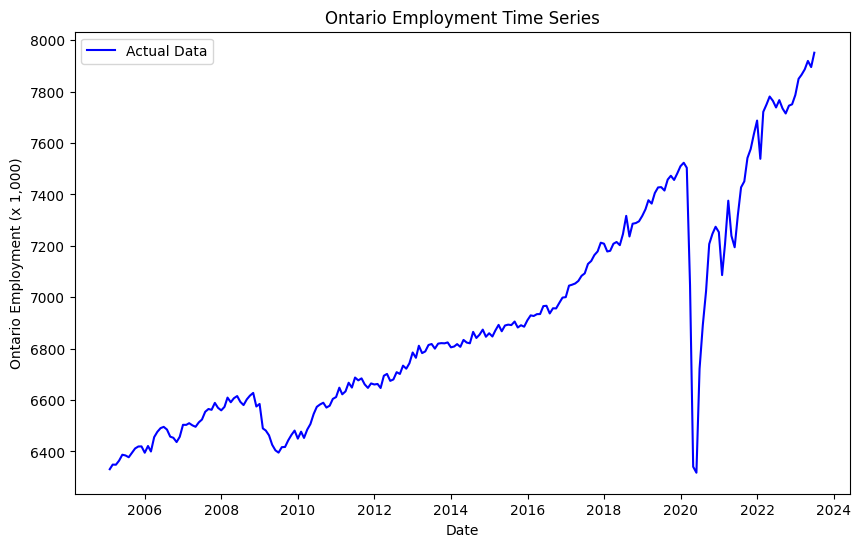

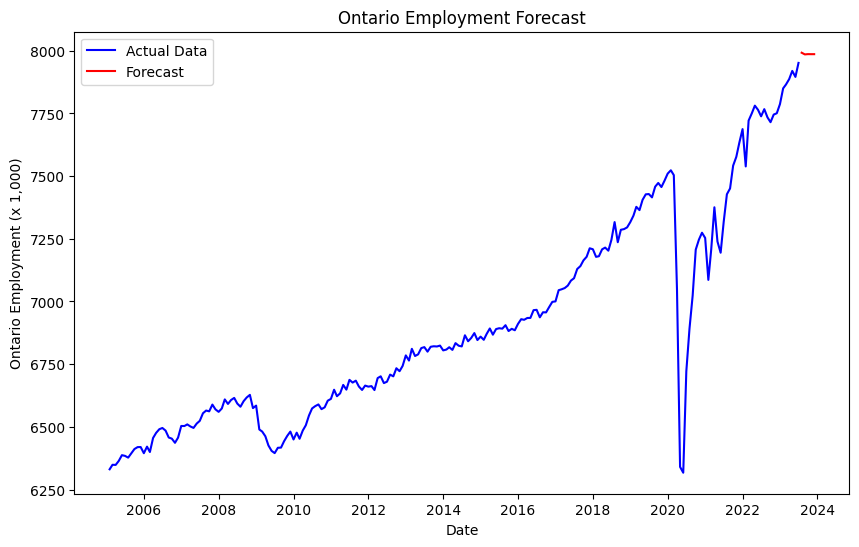

               Forecast
2023-06-30          NaN
2023-07-31  7991.911711
2023-08-31  7985.194129
2023-09-30  7986.305284
2023-10-31  7986.121488
2023-11-30  7986.151889


In [124]:
df = pd.DataFrame(df1)
# Convert 'Date' column to datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' column as the index
df.set_index('Date', inplace=True)

# Manually set the frequency to monthly (M)
df.index = pd.date_range(start=df.index[0], periods=len(df), freq='M')

# Plot the original data
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Ontario employment (x 1,000), seasonally adjusted'], label='Actual Data', color='blue')
plt.xlabel('Date')
plt.ylabel('Ontario Employment (x 1,000)')
plt.title('Ontario Employment Time Series')
plt.legend()
plt.show()

# Fit ARIMA model to the data
model = sm.tsa.ARIMA(df['Ontario employment (x 1,000), seasonally adjusted'], order=(1, 1, 1))
results = model.fit()

# Make predictions for future dates (e.g., next 6 months)
future_dates = pd.date_range(start=df.index[-1], periods=6, freq='M')
forecast = results.forecast(steps=6)

# Create a DataFrame for the predictions
predictions = pd.DataFrame({'Forecast': forecast}, index=future_dates)

# Plot the predictions
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Ontario employment (x 1,000), seasonally adjusted'], label='Actual Data', color='blue')
plt.plot(predictions.index, predictions['Forecast'], label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Ontario Employment (x 1,000)')
plt.title('Ontario Employment Forecast')
plt.legend()
plt.show()

# Display the forecasted values
print(predictions)

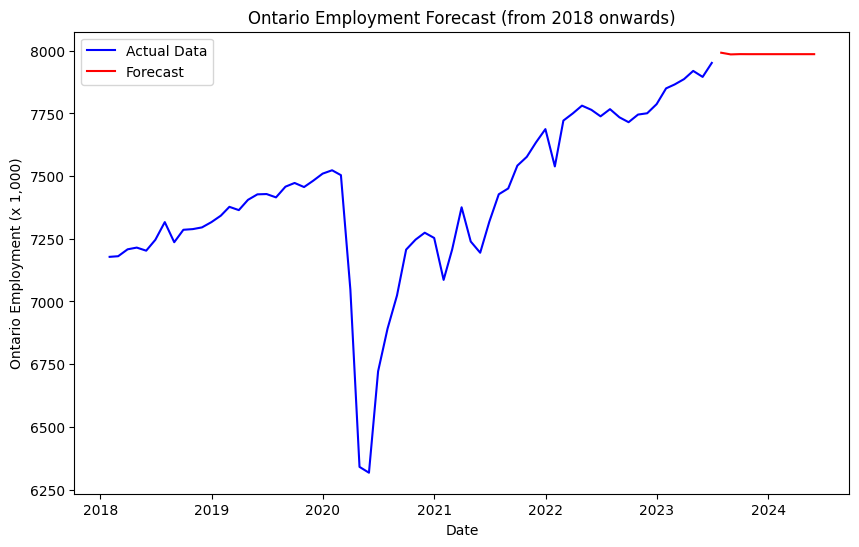

               Forecast
2023-06-30          NaN
2023-07-31  7991.911711
2023-08-31  7985.194129
2023-09-30  7986.305284
2023-10-31  7986.121488
2023-11-30  7986.151889
2023-12-31  7986.146861
2024-01-31  7986.147693
2024-02-29  7986.147555
2024-03-31  7986.147578
2024-04-30  7986.147574
2024-05-31  7986.147575


In [132]:
# Create a DataFrame
df = pd.DataFrame(df1)

# Convert 'Date' column to datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' column as the index
df.set_index('Date', inplace=True)

# Manually set the frequency to monthly (M)
df.index = pd.date_range(start=df.index[0], periods=len(df), freq='M')

# Fit ARIMA model to the data
model = sm.tsa.ARIMA(df['Ontario employment (x 1,000), seasonally adjusted'], order=(1, 1, 1))
results = model.fit()

# Make predictions for future dates (e.g., until the year 2025)
future_dates = pd.date_range(start=df.index[-1], periods=12, freq='M')
forecast = results.forecast(steps=36)

# Create a DataFrame for the predictions
predictions = pd.DataFrame({'Forecast': forecast}, index=future_dates)

# Filter data and predictions from 2018 onwards
start_date = '2018-01-01'
filtered_df = df[df.index >= start_date]
filtered_predictions = predictions[predictions.index >= start_date]

# Plot the data and predictions
plt.figure(figsize=(10, 6))
plt.plot(filtered_df.index, filtered_df['Ontario employment (x 1,000), seasonally adjusted'], label='Actual Data', color='blue')
plt.plot(filtered_predictions.index, filtered_predictions['Forecast'], label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Ontario Employment (x 1,000)')
plt.title('Ontario Employment Forecast (from 2018 onwards)')
plt.legend()
plt.show()

# Display the forecasted values until 2025
print(filtered_predictions)

###Employment in Ontario increased in June by 55,800 (0.7%) to 7,951,300, after decreasing by 23,900 (−0.3%) in May. Provincial employment has been on an upward trend in recent months, with job gains totalling 236,400 since September 2022.

###Employment in Canada increased in June by 59,900 (0.3%), after decreasing by 17,300 (−0.1%) in May. A total of 20,172,800 people were employed in Canada in June.

In [39]:
df2.info()
df2.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 798 entries, 0 to 797
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Month                       798 non-null    object 
 1   SIC                         798 non-null    object 
 2    Employment, Ontario (000)  798 non-null    float64
dtypes: float64(1), object(2)
memory usage: 18.8+ KB


,Month,SIC,"Employment, Ontario (000)"
0,01/01/2020,"Total employed, all industries",7523.2
1,01/01/2020,Goods-producing sector,1486.1
2,01/01/2020,Agriculture,75.0
3,01/01/2020,"Forestry, fishing, mining, quarrying, oil an...",35.8
4,01/01/2020,Utilities,53.5


In [50]:
# Create a scatter plot using plotly express
scatter_fig = px.scatter(df, x='Month', y=' Employment, Ontario (000)', color='SIC',
                         labels={' Employment, Ontario (000)': 'Employment (in thousands)'},
                        # category_orders={'Month': ['Jan', 'Feb', 'Mar','Apr']},
                         width=1200, height=700)

# Create a line plot using plotly express
line_fig = px.line(df, x='Month', y=' Employment, Ontario (000)', color='SIC',
                   labels={' Employment, Ontario (000)': 'Employment (in thousands)'},
                 # category_orders={'Month': ['Jan', 'Feb', 'Mar', 'Apr']},
                   width=1200, height=700)

# Combine both plots into one figure
combined_fig = scatter_fig.add_traces(line_fig.data)

# Show the combined interactive plot
combined_fig.show()

In [66]:

df = pd.DataFrame(df2)
# Remove specific SIC categories
excluded_sics = ['Total employed, all industries', 'Services-producing sector','Goods-producing sector']
df = df[~df['SIC'].isin(excluded_sics)]

# Calculate the trend (slope) for each SIC category
trends = df.groupby('SIC').apply(lambda group: np.polyfit(range(len(group)), group[' Employment, Ontario (000)'], 1)[0])

# Create a scatter plot using plotly express
fig = px.scatter(df, x='Month', y=' Employment, Ontario (000)', color='SIC',
                 labels={'Employment, Ontario (000)': 'Employment (in thousands)'},
                 category_orders={'Month': ['Jan', 'Feb', 'Mar']},
                 width=1200, height=1000)

# Add annotations for each SIC category to show trend direction
for sic, trend in trends.items():
    trend_direction = 'Upward Trend' if trend > 0 else 'Downward Trend'
    y_pos = df[df['SIC'] == sic][' Employment, Ontario (000)'].max() + 10
    fig.add_annotation(
        x='Feb', y=y_pos,
        text=trend_direction, showarrow=False
    )

# Show the interactive plot
fig.show()

###Ontario’s largest industry groups by employment in June were wholesale and retail trade (1,137,500 or 14.3% of total employment), health care and social assistance (966,900 or 12.2%), professional, manufacturing (819,900 or 10.3%), scientific and technical services (810,000 or 10.2%) and finance, insurance, real estate, rental and leasing (693,200 or 8.7%).

###Ten of the sixteen major industry groups recorded job gains in June. Wholesale and retail trade (11,900 or 1.1%), transportation and warehousing (9,700 or 2.5%), manufacturing (7,300 or 0.9%) and professional, scientific and technical services (6,700 or 0.8%) led job gains.

###Employment losses occurred in accommodation and food services (−2,700 or −0.6%), educational services (−2,300 or −0.4%), construction (−1,800 or −0.3%) and information, culture and recreation (−1,500 or −0.4%) in June.

###Employment was unchanged in agriculture and utilities in June.

In [67]:
df3.info()
df3.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 3 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Month                        154 non-null    object
 1   Broad occupational category  154 non-null    object
 2    Employment, Ontario (000)   154 non-null    object
dtypes: object(3)
memory usage: 3.7+ KB


,Month,Broad occupational category,"Employment, Ontario (000)"
0,05/01/2022,"Total, all occupations",7847
1,05/01/2022,Management occupations,743.7
2,05/01/2022,"Business, finance and administration occupations",1326.8
3,05/01/2022,Natural and applied sciences and related occup...,782.6
4,05/01/2022,Health occupations,602.3


In [75]:
df = pd.DataFrame(df3)
excluded_sics = ['Total, all occupations']
df = df[~df['Broad occupational category'].isin(excluded_sics)]
# Convert 'Employment, Ontario (000)' column to numeric
df[' Employment, Ontario (000)'] = pd.to_numeric(df[' Employment, Ontario (000)'], errors='coerce')

# Create the interactive bar chart using Plotly Express
fig = px.line(df, x='Month', y=' Employment, Ontario (000)', color='Broad occupational category',
             labels={'Employment, Ontario (000)': 'Employment (000)', 'Broad occupational category': 'Category'})

# Update the layout to add a title and rotate x-axis labels
fig.update_layout(title='Employment Change in Ontario by Month and Occupational Category',
                  xaxis_tickangle=-45)

# Show the interactive plot
fig.show()

###Ontario’s largest occupational groups by employment in June were sales and service (1,733,500 or 21.5% of total employment), business, finance and administration (1,368,700 or 17.0%), trades, transport and equipment operators (1,167,700 or 14.5%), occupations in education, law and social, community and government services (895,300 or 11.1%) and management (823,700 or 10.2%).

###Seven of the ten major occupational groups in Ontario had net employment gains in the first six months of 2023 when compared to the same period in 2022. Management occupations (74,000 or 10.0%) led job gains, followed by trades, transport and equipment operators and related occupations (72,900 or 7.0%), occupations in art, culture, recreation and sport (24,700 or 12.1%) and occupations in education, law, social, community and government services (22,900 or 2.6%).

###Employment losses were recorded in occupations in manufacturing and utilities (−20,600 or −5.4%), natural resources, agriculture and related production occupations (−9,200 or −10.7%), and natural and applied sciences and related occupations (−8,300 or −1.1%).

In [79]:
df5.info()
df5.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       222 non-null    object 
 1   Unemployment_rate_Canada   222 non-null    float64
 2   Unemployment_rate_Ontario  222 non-null    float64
dtypes: float64(2), object(1)
memory usage: 5.3+ KB


,Date,Unemployment_rate_Canada,Unemployment_rate_Ontario
0,01-01-2005,6.9,6.7
1,02-01-2005,7.0,6.8
2,03-01-2005,6.9,6.8
3,04-01-2005,6.7,6.7
4,05-01-2005,7.0,7.1


In [80]:
# Create a DataFrame
df = pd.DataFrame(df5)

# Convert 'Date' column to datetime type and handle errors with 'coerce'
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Drop rows with invalid dates (NaT)
df = df.dropna(subset=['Date'])

# Create an interactive line plot using plotly
fig = go.Figure()

# Add trace for Canada unemployment rate
fig.add_trace(go.Scatter(x=df['Date'], y=df['Unemployment_rate_Canada'], mode='lines', name='Canada'))

# Add trace for Ontario unemployment rate
fig.add_trace(go.Scatter(x=df['Date'], y=df['Unemployment_rate_Ontario'], mode='lines', name='Ontario'))

# Set layout for the graph
fig.update_layout(
    title='Unemployment Rates in Canada and Ontario',
    xaxis_title='Date',
    yaxis_title='Unemployment Rate (%)',
    xaxis=dict(showline=True, showgrid=False),
    yaxis=dict(showline=True, showgrid=False),
    hovermode='x',  # Enable hover interactions
    showlegend=True
)

# Show the interactive graph
fig.show()

###Ontario’s unemployment rate increased to 5.7% in June from 5.5% in May, marking the second consecutive monthly increase after trending downward since November 2022.

###June’s unemployment rate increased as employment gains were outpaced by gains in the labour force.

###The Canadian unemployment rate rose to 5.4% in June from 5.2% in May

In [91]:
df8.info()
df8.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           102 non-null    object
 1   CPI Inflation  101 non-null    object
 2   Wage Change    102 non-null    object
dtypes: object(3)
memory usage: 2.5+ KB


,Date,CPI Inflation,Wage Change
0,01/01/2015,1.60%,1.50%
1,02/01/2015,1.30%,1.70%
2,03/01/2015,1.60%,2.20%
3,04/01/2015,0.80%,2.00%
4,05/01/2015,0.90%,3.10%


In [92]:
df = pd.DataFrame(df8)

df['Date'] = pd.to_datetime(df['Date'])

# Remove the percentage symbol and convert 'CPI Inflation' and 'Wage Change' to numeric
df['CPI Inflation'] = pd.to_numeric(df['CPI Inflation'].str.rstrip('%'), errors='coerce')
df['Wage Change'] = pd.to_numeric(df['Wage Change'].str.rstrip('%'), errors='coerce')

# Create the interactive line plot using Plotly
fig = px.line(df, x='Date', y=['CPI Inflation', 'Wage Change'], title='CPI Inflation vs. Wage Change',
              labels={'value': 'Percentage'}, hover_name='Date', line_shape='linear')

# Show the interactive plot
fig.show()

###The average hourly wage rate in Ontario for employees was \$34.02 in June, above the average rate across Canada (\$33.12). Ontario’s average hourly wage rate in June rose by 3.7% on a year-over-year basis (by \$1.22 from \$32.80 in June 2022 and was below the 5.1% increase in May.

###June’s wage growth (3.7%) was above the growth seen in the Ontario Consumer Price Index (CPI) as of May (3.1%). The CPI is a measure of inflation that represents changes in prices for goods and services as experienced by consumers.